In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [ ]:
###----------------------------------------------------
### Plot number of classes in training and testing sets
###----------------------------------------------------

def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: accuracy
            column 1: loss
            column 2: val_accuracy
            column 3: val_loss
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y4] == hist_df[y4].min()]

    ax = axes[0]

    hist_df.plot(y = [y2,y4], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n   test: {:6.4f}'
    txtstr = txtFmt.format(y2.capitalize(),
                           hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel('Epochs')
    ax.set_ylabel(y2.capitalize())
    ax.set_title('Errors')
    ax.grid(True)
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y1, y3], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n  test:  {:6.4f}'
    txtstr = txtFmt.format(y1.capitalize(),
                           hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.grid(True)
    ax.legend(loc = 'lower left')

    plt.tight_layout()


def fn_plot_label(tr_ds, ts_ds, class_names = None):

    '''
        Args:
            tr_ds :  Training Dataset
            ts_ds : Testing dataset
            class_names : Class names
        Returns : none
    '''

    # create figure and axes
    fig, axes = plt.subplots(1,2, figsize = (15,5))

    # get names of the classes
    if not class_names:
        tr_class_names = tr_ds.class_names
        ts_class_names = tr_ds.class_names

    # pick first axis
    ax = axes[0]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in tr_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(tr_class_names, [class_counts.get(i, 0) for i in range(len(tr_class_names))],
           align='center',color = 'DarkBlue', alpha = 0.7)

    # add title
    ax.set_title('Training Set')

    # grids make it look good
    ax.grid(True)


    #pick second image
    ax = axes[1]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in ts_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(ts_class_names, [class_counts.get(i, 0) for i in range(len(ts_class_names))],
           align='center',color = 'orange', alpha = 0.7)

    # add title
    ax.set_title('Test Set')


    # grids make it look good
    ax.grid(True)

    # fit the subplot(s) in to the figure area
    plt.tight_layout()

    # display all open figures
    plt.show()



Names and PRN for all group members:
- Name: ______________________
- PRN:  ______________________
- Date: ______________________

# Deep Neural Networks
## A07: Group Assignment


##  Convolutional Neural Network (CNN)

- Flowers Dataset


In [ ]:
###-----------------
### Import Libraries
###-----------------

import os
import sys
import time
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

parent_dir = os.path.abspath('..')
sys.path.insert(0, parent_dir)


In [ ]:
###----------------------
### Some basic parameters
###----------------------
# inpDir = os.path.join('..', 'input')
inpDir= '../input'
outDir = '../output'
modelDir = 'models'
subDir = 'flower_photos'
altName = 'base_model'


ALPHA = 0.001
EPOCHS = 100
BATCH_SIZE = 8
PATIENCE = 30
LR_FACTOR = 0.1
LR_PATIENCE = 10
TEST_SIZE = 0.2
RANDOM_SEED = 42
BATCH_SIZE = 32
IMG_HEIGHT = 188
IMG_WIDTH = 188

RANDOM_STATE = 24 #  for initialization ------ REMEMBER: to remove at the the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible results
tf.random.set_seed(RANDOM_STATE)

# set location of input files and output files
inpDir = '../input'
outDir = '../output'
modelDir = '../models'
subDir = 'flower_photos'
altName = 'baes_model'

# parameters for Matplotlib
params = { 'legend.fontsize' : 'large',
           'figure.figsize': (15,8),
           'axes.labelsize' : 'large',
           'axes.titlesize' : 'x-large',
           'xtick.labelsize': 'large',
           'ytick.labelsize' : 'large',
           }
CMAP = 'brg' # plt.cm.Spectral
plt.rcParams.update(params)


## Load Dataset

Images are under flower_photos

     |- daisy
     |- dandelion
     |- roses
     |- sunflowers
     |- tulips

In [ ]:
'''
    For reading from web link
'''

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                  fname='flower_photos',
                                  untar=True)
data_dir = pathlib.Path(data_dir)
'''
    For reading from local directory
'''
# data_dir = os.path.join(inpDir, subDir)

'\n    For reading from local directory\n'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# folder_path = '/content/drive/MyDrive/flower_photos/'

# data_dir = os.path.join(folder_path)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=RANDOM_SEED,
    validation_split=TEST_SIZE,
    subset='training'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=RANDOM_SEED,
    validation_split=TEST_SIZE,
    subset='validation'
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names= train_ds.class_names
num_classes= len(class_names)
display(class_names, num_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

5

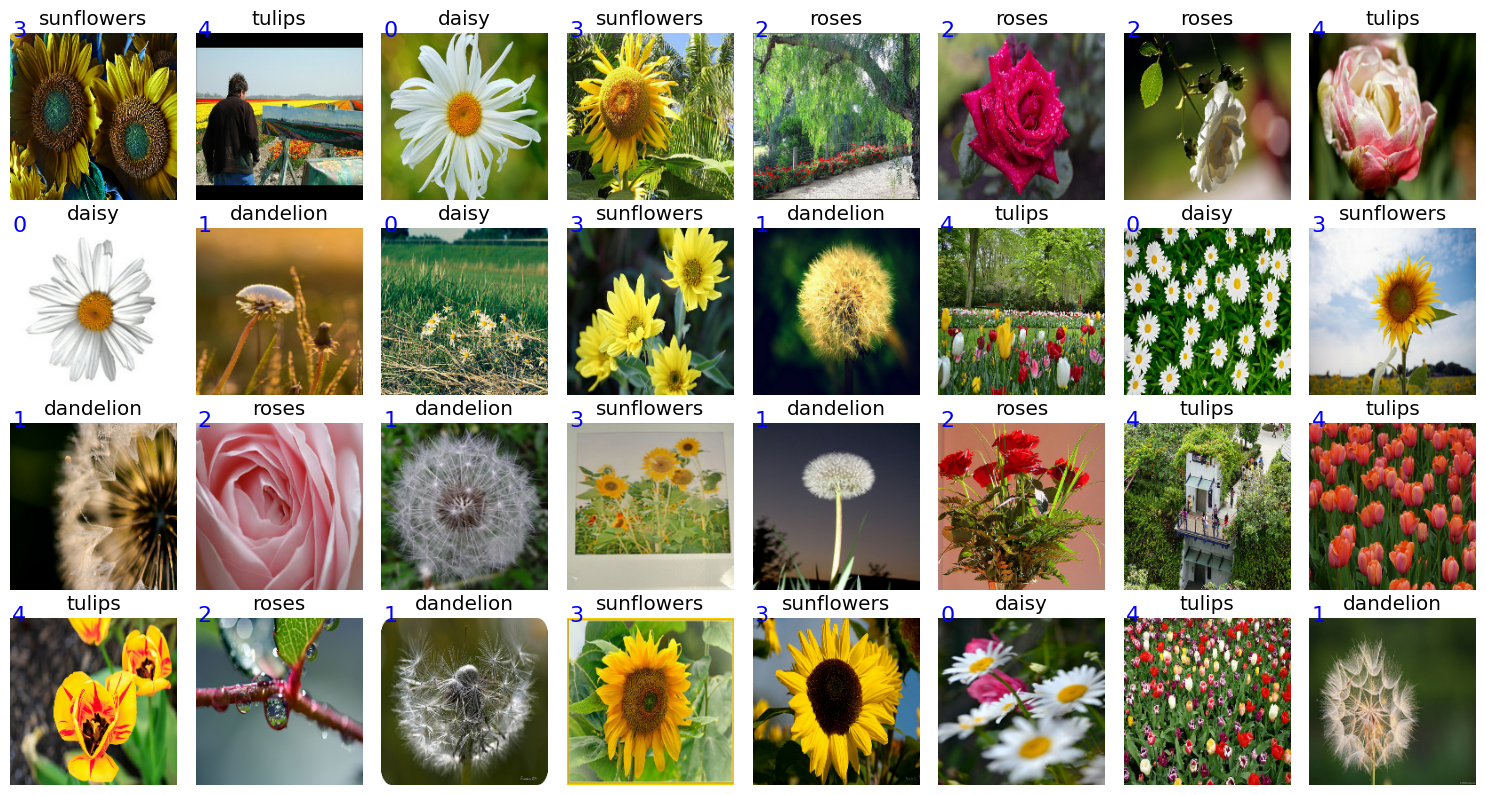

In [ ]:
for images, labels in train_ds.take(1):

    for i in range(BATCH_SIZE):
        plt.subplot(BATCH_SIZE//8, 8 ,i+1)

        plt.grid(False)

        plt.imshow(images[i].numpy().astype('uint8'), cmap = plt.cm.binary)

        # add the class nameof the image in red text above the numeric label
        plt.title(class_names[labels[i].numpy()])

        # add the numeric label of the image in blue text at a specific position
        plt.text(2, 4, labels[i].numpy(), color = 'b', fontsize = 16)

        # switching off axis
        plt.axis('off')
    plt.tight_layout()
    #display the entire grid of image
    plt.show()


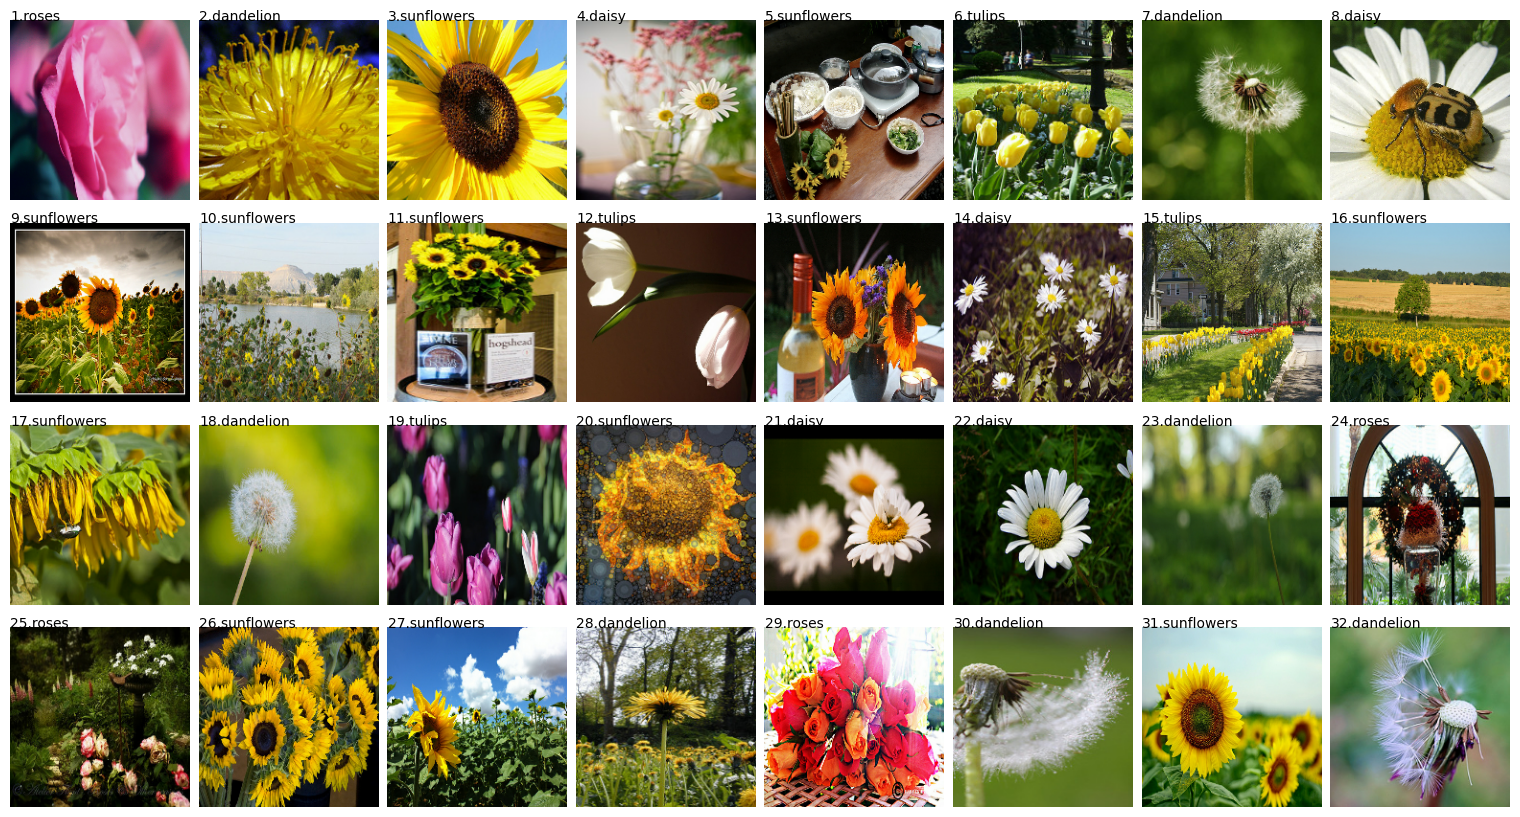

In [ ]:
# %%
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
i = 0
#  Take 1 Batch
for images, labels in test_ds.take(1):
    for i in range(BATCH_SIZE):
        plt.subplot(BATCH_SIZE//8, 8, i+1)
        plt.grid(False)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.text(
            x=0,
            y=0,
            s=f'{i+1}.{class_names[labels[i].numpy()]}',
            color='black',
            fontsize=10
        )
        plt.axis('off')

    plt.show()
    i += 1

plt.show()

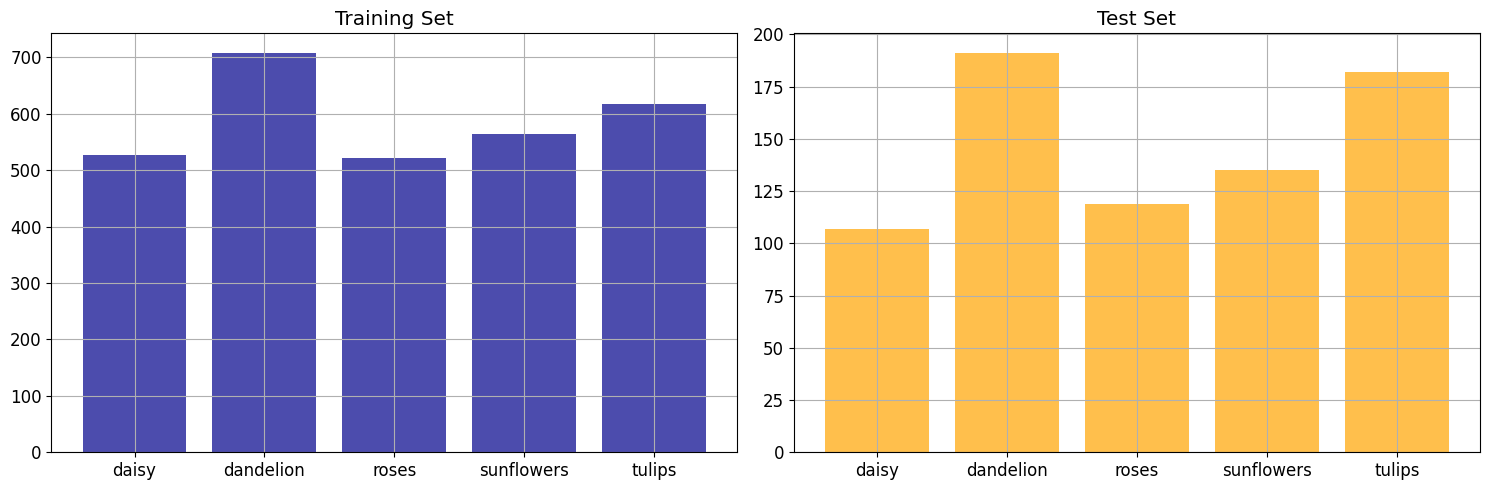

In [ ]:
fn_plot_label(train_ds, test_ds)

In [ ]:
input_shape= (IMG_HEIGHT, IMG_WIDTH, 3)

# Data Augmentation

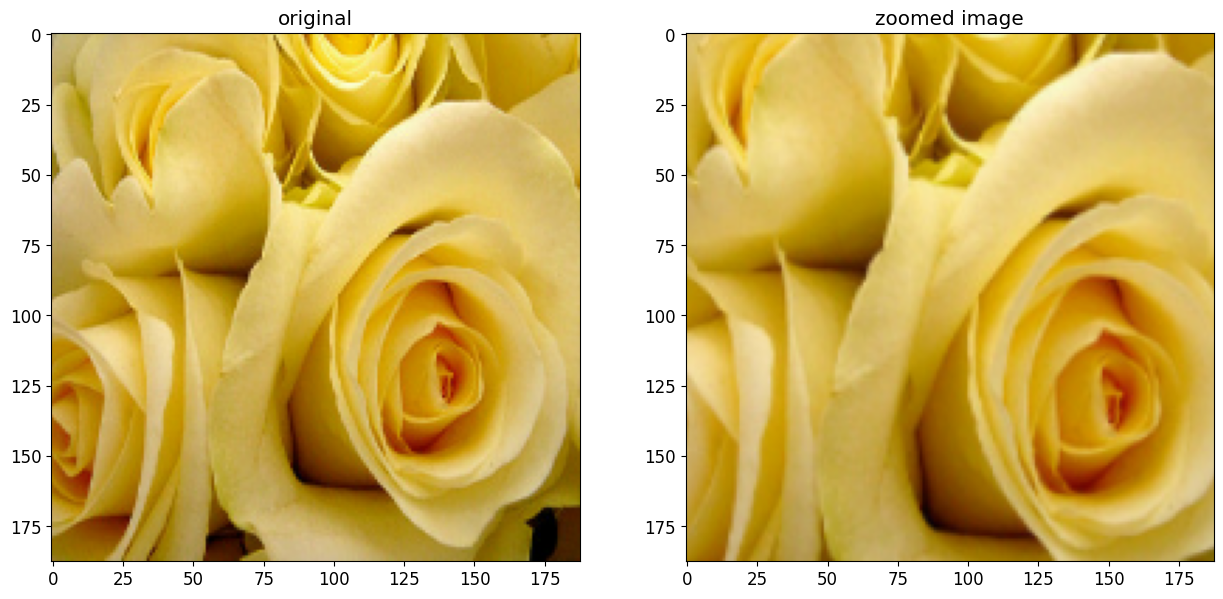

In [ ]:
layer = tf.keras.layers.RandomZoom(height_factor=(-.2,-.2), width_factor=(-.2,-.2),seed=RANDOM_SEED)
plt.figure()

img_num=1
for imgs, lbls in train_ds.take(1):
  out_image = layer(imgs)
  plt.subplot(1,2,1)
  plt.title('original')
  plt.imshow(imgs[img_num].numpy().astype('uint8'))# The method astype('uint8') converts the image data to the uint8 (unsigned 8-bit integer) type.

  plt.subplot(1,2,2)
  plt.title('zoomed image')
  plt.imshow(out_image[img_num].numpy().astype('uint8'))

### Reload best Weights for evaluation

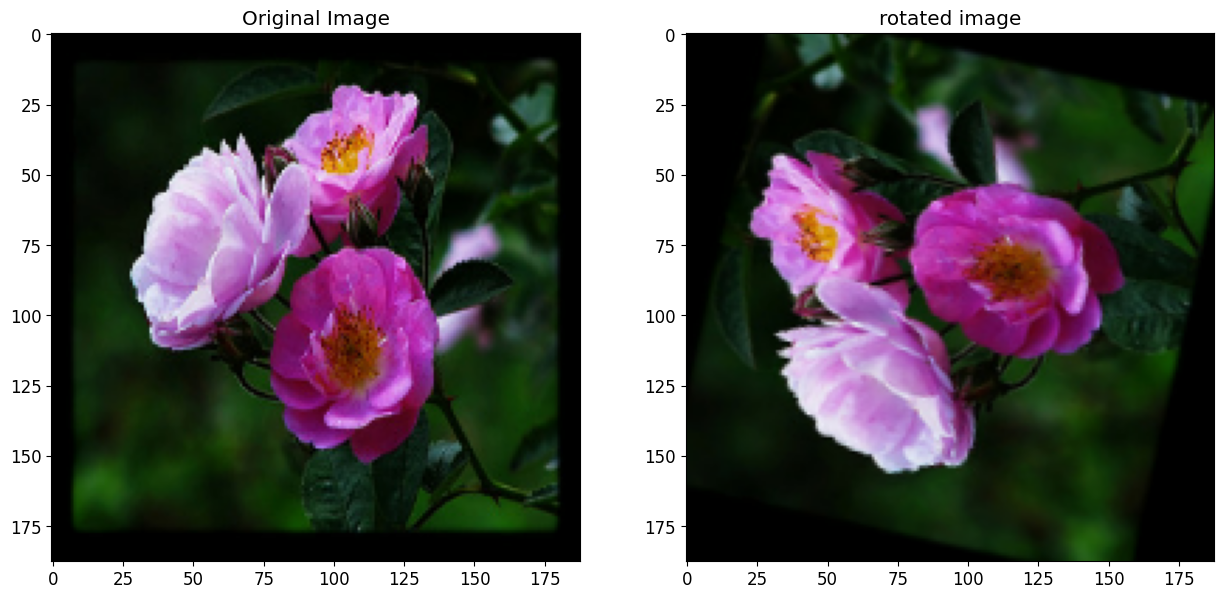

In [ ]:
layer =tf.keras.layers.RandomRotation((-0.5,0.5),
                                      fill_mode='nearest',
                                      seed=RANDOM_SEED)
plt.figure()

img_num=2
for imgs, lbls in train_ds.take(1):
  out_image = layer(imgs)
  plt.subplot(1,2,1)
  plt.title('Original Image')
  plt.imshow(imgs[img_num].numpy().astype('uint8'))

  plt.subplot(1,2,2)
  plt.title('rotated image')
  plt.imshow(out_image[img_num].numpy().astype('uint8'))

In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

# Preparing the Model

In [ ]:
# preparing the model

dor1, dor2, dor3, dor4, dor5, dor6 = 0.36, 0.3, 0.24, 0.16, 0.12, 0.1
dor7, dor8, dor9 = 0.1, 0.05, 0.0


# Regularizers
krnl_init = tf.keras.initializers.GlorotUniform(seed=RANDOM_STATE)
krnl_regularizer = tf.keras.regularizers.L2(l2=0.001)
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)



# input layer
inputs = tf.keras.Input(shape=input_shape, name='input')
# rescaling layer
x = tf.keras.layers.Rescaling(1./255.)(inputs)




# convolutional layer 1
x = tf.keras.layers.Conv2D(
    64, (3,3),
    kernel_regularizer=krnl_regularizer,
    kernel_initializer=krnl_init,
    padding='same',
    # activation='relu',
    name='conv_1')(x) # 188x188x64
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(dor1)(x)
# max pooling layer 1
x = tf.keras.layers.MaxPool2D(
    pool_size=(2,2),
    padding='same',
    name='maxpool_1'
)(x) # 94x94x64





# convolutional layer 2
x = tf.keras.layers.Conv2D(
    128, (3,3),
    kernel_regularizer=krnl_regularizer,
    kernel_initializer=krnl_init,
    padding='valid',
    # activation='relu',
    name='conv_2')(x) # 92x92x64
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(dor2)(x)
# max pooling layer 2
x = tf.keras.layers.MaxPool2D(
    pool_size=(2,2),
    padding='valid',
    name='maxpool_2'
)(x) #  46x46x128




# convolutional layer 3
x = tf.keras.layers.Conv2D(
    256, (3,3),
    kernel_regularizer=krnl_regularizer,
    kernel_initializer=krnl_init,
    padding='valid',
    # activation='relu',
    name='conv_3')(x) # 44x44x256
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(dor3)(x)
# max pooling layer 3
x = tf.keras.layers.MaxPool2D(
    pool_size=(2,2),
    padding='valid',
    name='maxpool_3'
)(x) #  20x20x256




# convolutional layer 4
x = tf.keras.layers.Conv2D(
    512, (3,3),
    kernel_regularizer=krnl_regularizer,
    kernel_initializer=krnl_init,
    padding='valid',
    # activation='relu',
    name='conv_4')(x) # 20x20x512
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(dor4)(x)
# max pooling layer 4
x = tf.keras.layers.MaxPool2D(
    pool_size=(2,2),
    padding='valid',
    name='maxpool_4'
)(x) #  10x10x512





# convolutional layer 5
x = tf.keras.layers.Conv2D(
    1024, (3,3),
    kernel_regularizer=krnl_regularizer,
    kernel_initializer=krnl_init,
    padding='valid',
    # activation='relu',
    name='conv_5')(x) # 8x8x1024
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(dor5)(x)
# max pooling layer 2
x = tf.keras.layers.MaxPool2D(
    pool_size=(2,2),
    padding='valid',
    name='maxpool_5'
)(x) #  4x4x1024







# convolutional layer 6
x = tf.keras.layers.Conv2D(
    2048, (3,3),
    kernel_regularizer=krnl_regularizer,
    kernel_initializer=krnl_init,
    padding='valid',
    # activation='relu',
    name='conv_6')(x) # 4x4x2048
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(dor6)(x)





# flattening layer
x = tf.keras.layers.Flatten()(x)



# dense layers 1
x = tf.keras.layers.Dense(
    1024,
    kernel_regularizer=krnl_regularizer,
    kernel_initializer=krnl_init,
    # activation='relu',
    name='dense_1'
)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(dor7)(x)

# dense layers 2
x = tf.keras.layers.Dense(
    128,
    kernel_regularizer=krnl_regularizer,
    kernel_initializer=krnl_init,
    # activation='relu',
    name='dense_2'
)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(dor8)(x)


# dense layers 3
x = tf.keras.layers.Dense(
    64,
    kernel_regularizer=krnl_regularizer,
    kernel_initializer=krnl_init,
    # activation='relu',
    name='dense_3'
)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(dor9)(x)


# dense layers 4
outputs = tf.keras.layers.Dense(
    5,
    kernel_initializer=krnl_init,
    name='output'
)(x)

# %%
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='MNIST_CNN')
model.summary()

Model: "MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 188, 188, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 188, 188, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1 (Conv2D)                      │ (None, 188, 188, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 188, 188, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 188, 188, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 188, 188, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_1 (MaxPooling2D)             │ (None, 94, 94, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 92, 92, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 92, 92, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 92, 92, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 92, 92, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_2 (MaxPooling2D)             │ (None, 46, 46, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3 (Conv2D)                      │ (None, 44, 44, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 44, 44, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 44, 44, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 44, 44, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_3 (MaxPooling2D)             │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_4 (Conv2D)                      │ (None, 20, 20, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 20, 20, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,697,413 (128.55 MB)

 Trainable params: 33,686,917 (128.51 MB)

 Non-trainable params: 10,496 (41.00 KB)

In [ ]:
os.makedirs("chkptFiles", exist_ok=True)
chkptFilePath = os.path.join(os.getcwd(), "chkptFiles", "cnn.weights.h5")

mcb = tf.keras.callbacks.ModelCheckpoint(chkptFilePath,
                                         monitor = "val_loss",
                                         verbose = 1,
                                         save_best_only = True,
                                         save_weights_only = True)

escb = tf.keras.callbacks.EarlyStopping(patience = PATIENCE,
                                        verbose = 1,
                                        restore_best_weights = True)

lrcb = tf.keras.callbacks.ReduceLROnPlateau(factor = LR_FACTOR,
                                            patience = LR_PATIENCE,
                                            verbose = 1)


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.AdamW(learning_rate = ALPHA)

model.compile(optimizer = optimizer,
              loss = loss_fn,
              metrics = ["accuracy"])


In [ ]:
history = model.fit(train_ds,
                    validation_data = test_ds,
                    verbose = 2,
                    callbacks = [mcb, escb, lrcb],
                    epochs = EPOCHS)

Epoch 1/100

Epoch 1: val_loss improved from inf to 8.19373, saving model to /content/chkptFiles/cnn.weights.h5
92/92 - 66s - 718ms/step - accuracy: 0.5068 - loss: 6.3989 - val_accuracy: 0.2602 - val_loss: 8.1937 - learning_rate: 0.0010
Epoch 2/100

Epoch 2: val_loss improved from 8.19373 to 5.20839, saving model to /content/chkptFiles/cnn.weights.h5
92/92 - 15s - 161ms/step - accuracy: 0.6158 - loss: 4.5788 - val_accuracy: 0.2602 - val_loss: 5.2084 - learning_rate: 0.0010
Epoch 3/100

Epoch 3: val_loss improved from 5.20839 to 4.66176, saving model to /content/chkptFiles/cnn.weights.h5
92/92 - 15s - 163ms/step - accuracy: 0.6625 - loss: 3.1576 - val_accuracy: 0.2602 - val_loss: 4.6618 - learning_rate: 0.0010
Epoch 4/100

Epoch 4: val_loss improved from 4.66176 to 3.71372, saving model to /content/chkptFiles/cnn.weights.h5
92/92 - 14s - 155ms/step - accuracy: 0.6723 - loss: 2.3585 - val_accuracy: 0.2602 - val_loss: 3.7137 - learning_rate: 0.0010
Epoch 5/100

Epoch 5: val_loss improved 

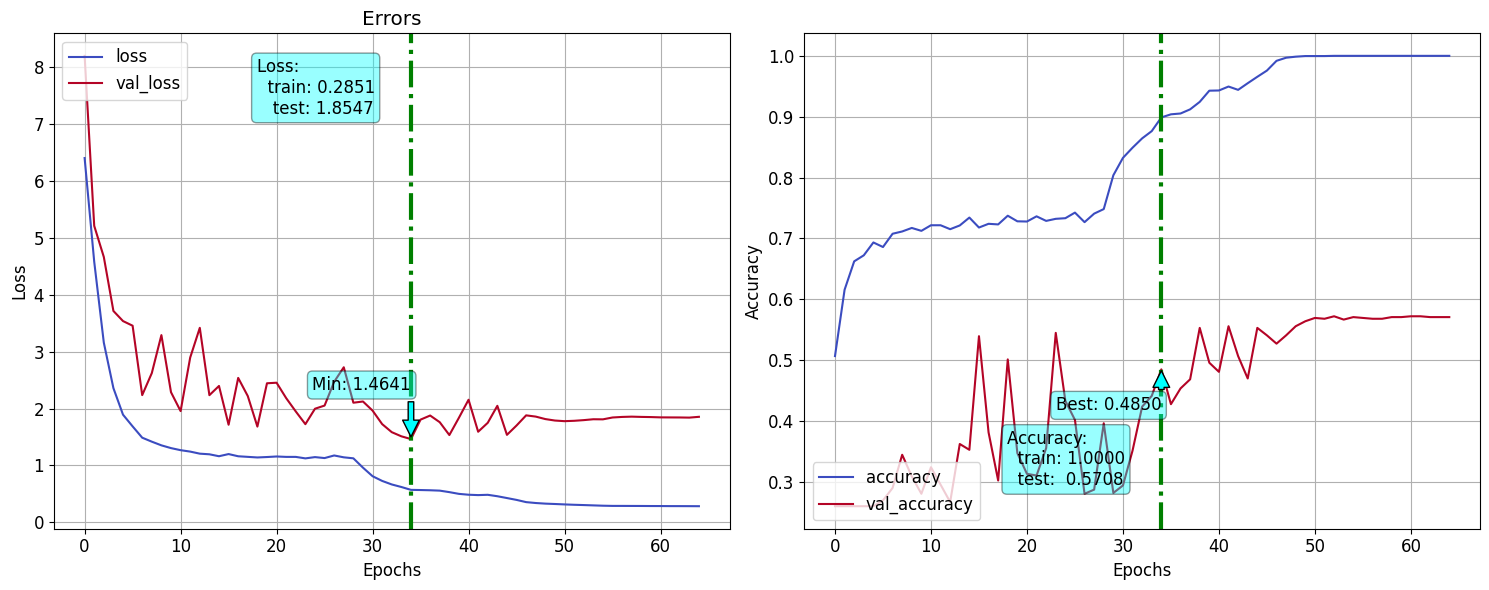

In [ ]:
hist_df = pd.DataFrame(history.history)
fn_plot_tf_hist(hist_df = hist_df)

Reload best Weights for evaluation

### Evaluate the model

## Validate on the validation set